# Wave Packets

A **wave packet** is small, localized oscillation in a medium.

We will study how we can obtain wave packets by summing up sinusoidal periodic waves of various frequencies.

## Required packages

In [1]:
using Plots

## Sinusoidal wave generation

First, let's try to generate and plot a sine wave.

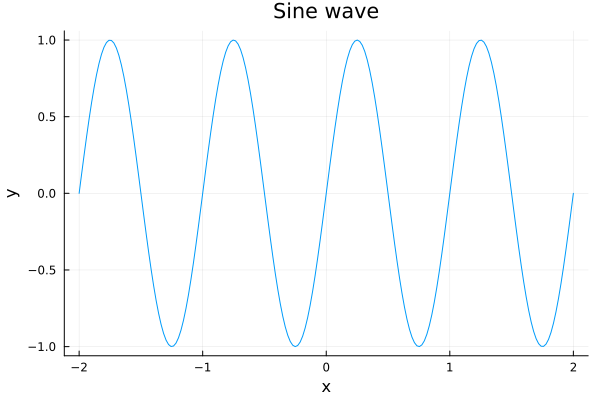

In [2]:
x = range(-2, 2, length=200)
y = sin.(2 * π * x)

plot(x, y, xlabel="x", ylabel="y", title="Sine wave", legend=false)

## Gaussian wave packet

Let's say we want to obtain a non-dispersive wave packet. We'll reuse [this example](https://en.wikipedia.org/wiki/Wave_packet#Non-dispersive) from Wikipedia, which has all the computations already done for us.

**TO DO**: redo all the computations by hand, to make sure I understand them.

What we want to obtain is the function
$$
    u(x) = e^{-x^2} \cos(2 \pi x)
$$
which is a wave packet and valid solution to the Helmholtz equation (the stationary version of the wave equation), which is nothing more than an eigenfunction-eigenvalue equation:
$$
    \Delta u = \lambda u
$$
for some $\lambda \in \mathbb{R}$.

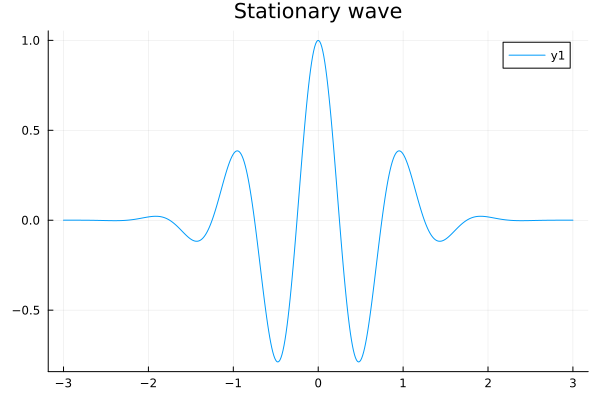

In [3]:
x = range(-3, 3, length=500)
solution = exp.(-x.^2) .* cos.(2 * π * x)
plot(x, solution, title="Stationary wave")

We can compute the Fourier coefficients $\hat{u}(\xi)$ by using the Fourier transform:
$$
\begin{align*}
  \hat{u}(\xi) &= \int_{-\infty}^{+\infty} u(x) e^{- i x \xi} \mathrm{d} x \\
  &= \int_{-\infty}^{+\infty} e^{-x^2} \cos(2 \pi x) e^{- i x \xi} \mathrm{d} x
\end{align*}
$$
We have that $\lvert \cos(2 \pi x) \rvert = 1$ and $\lvert e^{- i x \xi} \rvert = 1$, but the integral is absolutely convergent because $e^{-x^2} \to 0$ as $x \to \infty$.

We can use [Wolfram Alpha](https://www.wolframalpha.com/input?i=fourier+transform+of+e%5E%28-x%5E2%29+*+cos%282+*+pi+*+x%29) to get the result of the integral quickly:
$$
  \hat{u} (\xi) = \frac{\sqrt{\pi}}{2} e^{-(\xi + 2\pi)^2/4} \left(e^{2 \pi \xi} + 1\right)
$$

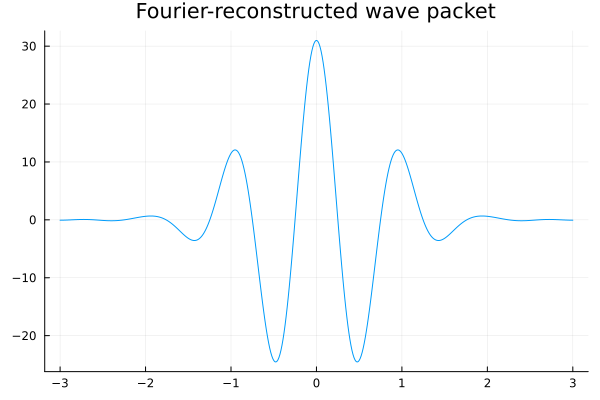

In [4]:
wave_packet = zeros(length(x))

frequency_interval = range(-10, 10, length=100)

for ξ in frequency_interval
    coefficient = √π/2 * exp(-(ξ + 2π)^2/4) * (exp(2 * π * ξ) + 1)
    wave = coefficient * cos.(ξ * x)
    wave_packet += wave
end

plot(x, wave_packet, title="Fourier-reconstructed wave packet", legend=false)